In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib inline
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve, minimize


# Extra Exercise

Try to approximate the brachistochrone by optimizing a number of lines.


In [127]:
y_init = 22.5
g = 9.81

def a_func(phi):
    return (np.cos(phi) - 1)/(phi - np.sin(phi)) + 3/4

phi_1 = fsolve(a_func, 0.5)[0]

print(f'phi1 = {phi_1:.2f}')


#phi1 defines the endpoint of the first segment of the curve, where x = 30 and y = 0:
a_brach = 30/(phi_1 - np.sin(phi_1))
y_0_brach = 0 - a_brach * (1 + np.cos(phi_1))
print(f'a = {a_brach:.2f}, y_0 = {y_0_brach:.2f}')

y_00 = a_brach * (1 + np.cos(0))

print(f'y_00 = {y_00:.2f}')

def y_lin(x, m):
    return m*x

def y_brach(x):
    phi_x = fsolve(lambda phi: a_brach * (phi - np.sin(phi)) - x, 0)[0]
    return y_0_brach + a_brach * (1 + np.cos(phi_x))


def dydx_brach(x, delta_x = 0.001):
    f_x = y_brach(x)
    f_x_dx = y_brach(x + delta_x)
    return (f_x_dx - f_x)/delta_x


slope = 1
def dxdt(t,x):
    y = y_lin(x, slope)

    if y_init - y < 0:
        return 0
    dxdt = np.sqrt(2*g * (y_init - y))* 1/np.sqrt(1 + slope**2)

    return dxdt




phi1 = 2.88
a = 11.44, y_0 = -0.39
y_00 = 22.89


In [210]:

N = 30
start_slope = -22.5/30
slopes = np.random.uniform(-1, 1, N)


def vector(x, y, x0 = 0, y0 = 0, x_scale = 1):
    vec = np.array([float(x), float(y)])
    vec /= np.linalg.norm(vec)
    vec /= vec[0]
    vec *= x_scale
    return [x0, x0 + vec[0]], [y0, y0 + vec[1]]


offset = 1e-3
xs = np.linspace(0, 40, 100)
x_for_vecs = np.linspace(0, 29, N) + offset
#y_for_vecs = np.array(np.random(0, 22.5, N))



x_vec, y_vec = vector(30, -22.5, 0, 22.5)
x_vec2, y_vec2 = vector(1, start_slope, 0, 22.5)





y = 22.5

def time(vec, x_velocity):
    slope = vec[1]/vec[0]
    x_init = 0
    t_init = 0
    t_final = 1
    t_range = [t_init, t_final]
    t_evals = np.linspace(t_init, t_final, 100)

    def dxdt(t,x):
        y = y_lin(x, slope)

        if y_init - y < 0:
            return 0
        dxdt = np.sqrt(2*g * (y_init - y))* 1/np.sqrt(1 + slope**2)

        return dxdt
    sol = solve_ivp(dxdt, t_range, [x_init], t_eval=t_evals, events = event)
    if sol.t_events[0].size == 0:
        return 1
    mean_velocity = 1/(sol.t_events[0][0]) + x_velocity
    return 1/mean_velocity




def event(t, x):
    return np.array(x) - 1

event.terminal = True



The total time to get from A to B is 0.23 seconds


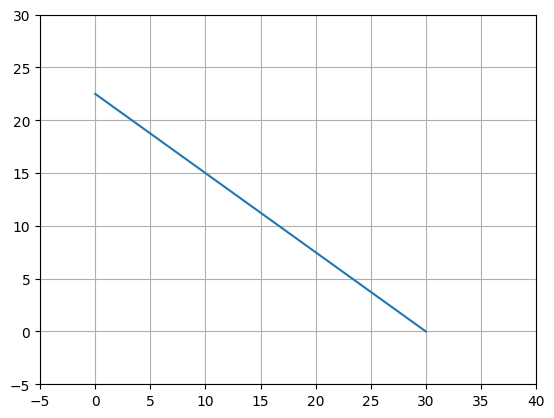

In [248]:
fig, ax = plt.subplots()
ax.set(xlim=(-5, 40), ylim=(-5, 30))
ax.grid()
N= 30
def curve(ys):
    
    y_for_vecs = np.append([22.5], ys)
    y_for_vecs = np.append(y_for_vecs, [0])
    velocity = 1e-3
    ax.plot(x_for_vecs, y_for_vecs, '-')
    total_time = 0
    for index in range(N):
        

        if index < N - 1:
            x_vec = x_for_vecs[index + 1] - x_for_vecs[index]
            y_vec = y_for_vecs[index + 1] - y_for_vecs[index]
            time_calculated = time([x_vec, y_vec], velocity)
            velocity = 1/time_calculated
            total_time += time_calculated
    return total_time


xs = np.linspace(1, 28, 28)
ys = -22.5/30 * xs + 22.5
x_for_vecs = np.append([0], xs)
x_for_vecs = np.append(x_for_vecs, [30])
#ys = np.random.uniform(0, 22.5, 28)


print(f'The total time to get from A to B is {curve(ys):.2f} seconds')

In [239]:
minimization = minimize(curve, ys, method = 'Nelder-Mead')

The minimum time to get from A to B is 0.33 seconds
[22.48562852  1.29050005 16.22929942 16.21818483 16.20438329 16.18131513
 16.16168741 -2.45032459 13.63336562 27.63286187  5.41179151  5.33543444
  2.4345183  18.51173422 18.51430618  9.13952802  4.66995233  1.51457063
 12.11211555 20.16699904  6.2638211  20.82852246 -0.25092229  9.76541908
 15.30896058  3.57328795 16.44382135  3.91964506]


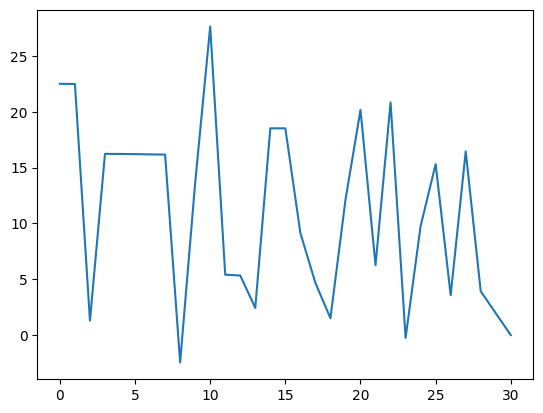

In [245]:
print(f'The minimum time to get from A to B is {minimization.fun:.2f} seconds')

curve(minimization.x)

print(minimization.x)

fig, ax = plt.subplots()

ys = minimization.x
y_for_vecs = np.append([22.5], ys)
y_for_vecs = np.append(y_for_vecs, [0])
ax.plot(x_for_vecs, y_for_vecs, '-')